### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.4041 - accuracy: 0.6352 - val_loss: 0.3477 - val_accuracy: 0.9083
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.9121 - val_loss: 0.2455 - val_accuracy: 0.9293
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2369 - accuracy: 0.9

### Relu Activation Function

In [ ]:
# Write your code here. Use the same architecture as above. 
%%time

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6098 - accuracy: 0.8256 - val_loss: 0.2029 - val_accuracy: 0.9396
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1838 - accuracy: 0.9453 - val_loss: 0.1493 - val_accuracy: 0.9538
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9

### Write your findings about activations here?

1.   Finding 1
2.   Finding 2






1.   Finding 1: The Sigmoid activation function yields a lower accuracy than the RELU activation.
2.   Finding2: The RELU activation function yields a higher accuracy than the Sigmoid activation.

Both take the same amount of computational time.





# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.1436 - accuracy: 0.3680 - val_loss: 1.4204 - val_accuracy: 0.7423
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.2222 - accuracy: 0.7664 - val_loss: 0.7804 - val_accuracy: 0.8184
Test loss: 0.7803730964660645
Test accuracy: 0.8184000253677368
Shape of First Layer (784, 8)
Visual

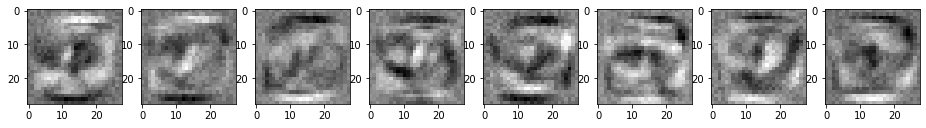

CPU times: user 5.1 s, sys: 511 ms, total: 5.61 s
Wall time: 4.57 s


In [11]:
%%time

first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.3653 - accuracy: 0.6532 - val_loss: 0.3580 - val_accuracy: 0.9103
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.9113 - val_loss: 0.2333 - val_accuracy: 0.9349
Test loss: 0.23331928253173828
Test accuracy: 0.9348999857902527
Shape of First Layer (784, 128)

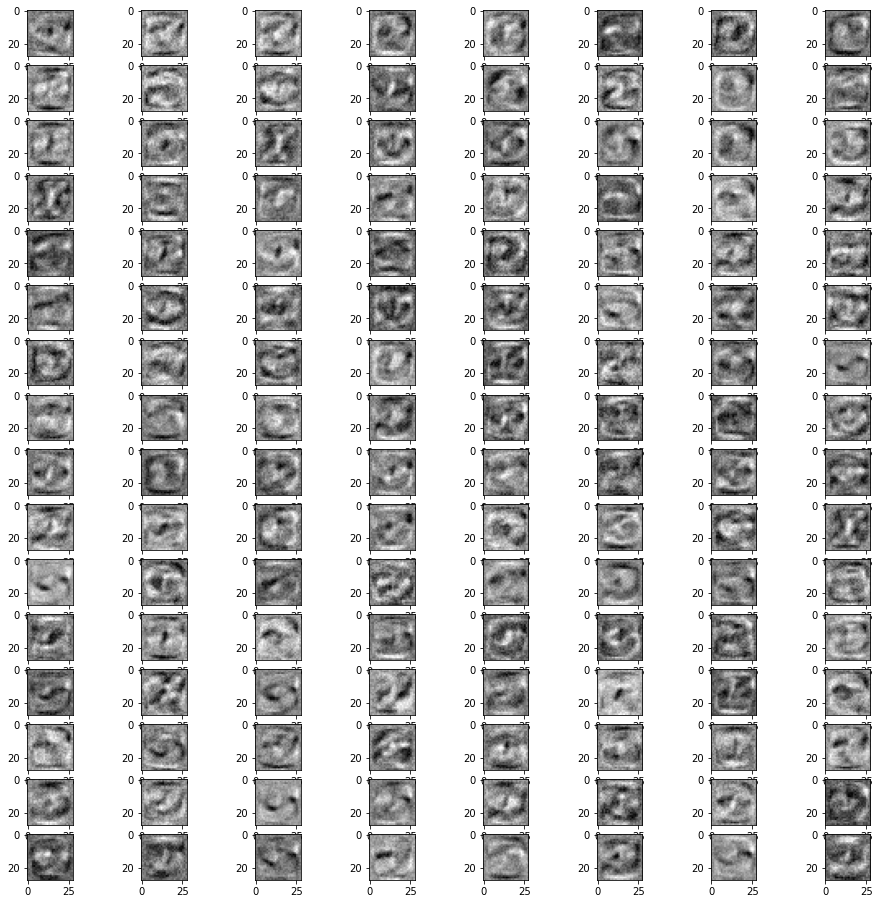

CPU times: user 14.3 s, sys: 542 ms, total: 14.8 s
Wall time: 13.7 s


In [12]:
# Write your code here 
%%time

first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()
# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

### Write your findings about influence of nodes here?

1.   Finding 1
2.   Finding 2






1.   Finding 1: Model with lower number of nodes takes less computational time, however it also yields lower accuracy, due to the low complexity of the NN.
2.   Finding 2: Model with higher number of nodes takes more computational time, and it yields higher accuracy, as the NN becomes complex. 



# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [13]:
%%time

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7575 - accuracy: 0.8038 - val_loss: 0.2701 - val_accuracy: 0.9208
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 0.9221 - val_loss: 0.2243 - val_accuracy: 0.9321
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2134 - accuracy: 0.9381 - val_loss: 0.1844 - val_accuracy: 0.9426
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1833 - acc

In [14]:
%%time

model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8048 - accuracy: 0.8078 - val_loss: 0.2699 - val_accuracy: 0.9283
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9262 - val_loss: 0.2189 - val_accuracy: 0.9386
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2019 - accuracy: 0.9430 - val_loss: 0.1868 - val_accuracy: 0.9469
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1721 - ac

In [15]:
%%time

model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2105 - accuracy: 0.7106 - val_loss: 0.0699 - val_accuracy: 0.9096
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9119 - val_loss: 0.0509 - val_accuracy: 0.9282
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9301 - val_loss: 0.0437 - val_accuracy: 0.9401
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0430 - ac

### Lower number of Layers. For example 4 hidden layers

In [17]:
# Write your code here 
%%time 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Use the same number of units from the above cell 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8905 - accuracy: 0.7368 - val_loss: 0.2

In [18]:
%%time 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.2633 - accuracy: 0.6958 - val_loss: 0.2

### Write your findings about influence of layers here?

1.   Finding 1
2.   Finding 2



1.   Finding 1: With lesser hidden layers, the accuracy was high and time was lesser.
2.   Finding 2: Adding more hidden layers actually decreased the accuracy, which was surprising, while it took more time.

Furthermore, upon investigation, it was observed that using tanh activation instead of RELU took more time while it yielded lower accuracy. 

In addition to that, using tanh as activation, and changing the loss function from categorical to binary crossentrophy caused the same effect, with decreased accuracy and increased time. 

Finally, with multiple layers, if all the layers had RELU as the activation function, it took lesser time however it also yielded lower accuracy, compared to the scenario where the layers were mixed up with RELU, tanh and sigmoid. 

